# __Time Series Modeling:__ _Exploratory Data Analysis_

_By: Trevor Rowland_ ([@dBCooper2](https://github.com/dBCooper2))

Examining different techniques for analyzing distributions of samples and ways to evaluate these distributions.

Notes from the _Statistics and Data Analysis for Financial Engineering_ Textbook, with some Python functions that apply the theory laid out in the textbook.

### _References_:

Ruppert, David and David S. Matteson. _Statistics and Data Analysis for Financial Engineering with R examples_. $2^{nd}$ ed., Springer, 2015.

### _Table of Contents_

[Textbook Notes](#textbook-notes)

__..__[4.1: Introduction](#41-introduction)

__..__[4.2: Histograms and Kernel Density Estimation](#42-histograms-and-kernel-density-estimation)

__..__[4.3: Order Statistics, The Sample CDF, and Sample Quantiles](#43-order-statistics-the-sample-cdf-and-sample-quantiles)
  
__....__[4.3.1: The Central Limit Theorem for Sample Quantiles](#431-the-central-limit-theorem-for-sample-quantiles)
  
__....__[4.3.2: Normal Probability Plots](#432-normal-probability-plots)
  
__....__[4.3.3: Half-Normal Plots](#433-half-normal-plots)
  
__....__[4.3.4: Quantile-Quantile Plots](#434-quantile-quantile-plots)

__..__[4.4: Tests of Normality](#44-tests-of-normality)

__..__[4.5: Boxplots](#45-boxplots)

__..__[4.6: Data Transformation](#46-data-transformation)

__..__[4.7: The Geometry of Transformations](#47-the-geometry-of-transformation)

__..__[4.8: Transformation Kernel Density Estimation](#48-transformation-kde)

Applying the theory to Python
  
  Graphing a Histogram in Python
  
  Creating a Kernel Density Estimator Function in Python
    
    Graph the Kernel Density Estimator
  
  Computing the Sample CDF
  
  Computing the Sample Quantiles
    
  Computing the Central Limit Theory for Sample Quantiles
    
  Graphing a Normal Probability Plot
    
  Graphing a Half-Normal Plot
    
  Graphing a QQ Plot
  
  Creating a Shapiro-Wilk Test Function in Python
  
  Data Transformation, Logs and Square Roots
  
  Graph the Transformed Kernel Density Estimator using the Transformed Data
   


## Textbook Notes

### _4.1 Introduction_

Looking at Figures 4.1, 4.2 and 4.3 in the textbook, there are 3 time series that fluctuate wildly. However, each time series appears _stationary_ and doesn't have a long term trend of increasing or decreasing over time. This means that while returns are random, the nature of the variation is constant over time.

<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_1.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_2.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_3.png" style="width: 100%;">
    </div>
</div>

Additionally, the textbook mentions that _volatility clustering_ appears in the graphs, where the volatility of an asset changes over time. This means there are periods of high and low volatility within a time series that can be measured.

Each time series can be modeled as a sequence $Y_1,Y_2,...$, where each $Y_i$ is a random variable. These random variables $Y$ each have a Cumulative Distribution Function(CDF) that is labeled as $F$. $F$ varies between series, but is assumed to be constant within a single series. 

#### _Appendix 2.1:_ Cumulative Distribution Functions

The _Cumulative Distribution Function_ of $Y$ is defined as:

$$F_Y(y) = P\{Y \leq y\}$$

If $Y$ has a __Probability Distribution Function__, or PDF, labeled $f_Y$, then

$$F_Y(y) = \int_{-\infty}^{y} f_Y(u) \,du $$

#### Probability Distribution Functions:

Probability Distribution Functions(PDFs) are mathematical functions that give the probabilities of expected observations for a given input.

Some examples are the Normal, the Lognormal, and the Hypergeometric Distribution.

In my MATH 3470 class, Probability Distribution functions are called __Probability Mass Functions__, describing the 'mass' of observations more clearly.

#### Back to _4.1: Introduction_
While $F$ is a CDF, it can also be called a Marginal Distribution Function. By a _Marginal_ distribution of a stationary time series, it is meant that $Y_t$ is a marginal distribution given that there is no knowledge of other $Y_s$ for any $s\neq t$

This means that for modeling marginal distributions, dependencies can be ignored in the time series.

For this reason, marginal distributions can also be called _unconditional distributions_. Dependencies like autocorrelation and volatility clustering will be discussed in later notebooks.

### _4.2: Histograms and Kernel Density Estimation_

Assume that the Marginal CDF $F$ has a probability density function $f$. __The probability density can be estimated using a Histogram__. 

This is a good first measure to look at the probability density, however outliers like the -.23 return in Fig. 4.1 are essentially invisible. Because those outliers are not bad data and should be studied, a better function to estimate the probability density should be used.

This better function is called the ___kernel density estimator___.

#### The Kernel Density Estimator

The Kernel Density Estimator, or KDE, based on the random events from the time series $Y_1, ..., Y_n$ is:

$$\hat{f}(y) = \frac{1}{nb}\sum_{i=1}^{n}K(\frac{y-Y_i}{b})$$

Where:

$K$ is the probability density function(and is symmetric about 0)

$b$ is the _bandwidth_, and determines the resolution of the estimator

$y$ is the input of the probability distribution function

$Y_i$ is the random event

and $n$ is the number of random events

#### Interpreting the KDE

A small $b$ means the estimator will have _high variance, but low bias_

A large $b$ means the estimator will have _low variance, but high bias_

This presents a tradeoff. While modern statistical software can usually automatically select the proper $b$-value, KDE's should still be graphed at different bandwidths and inspected visually.

The KDE is used to suggest what type of statistical model should be used. 

In textbook figure 4.6, the KDE's shown are bell-shaped, implying a suitable model could be the normal distribution. Figure 4.7 tests this by graphing the estimate KDE against the normal distribution's density to compare the fit between the two.

<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_6.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_7.png" style="width: 100%;">
    </div>
</div>

### Problems with the KDE

The main issue seen in Figs. 4.6-7 with the KDE is the parameters for the model must be estimated properly. 

Thankfully, there are other, better methods to compare samples to a theoretical distribution that will be outlined below.

### ___4.3: Order Statistics, the Sample CDF, and Sample Quantiles___

#### __The Sample CDF__

Take a random sample from a probability distribution with a CDF $F$. From this selection, $F$ and it's quantiles are estimated.

The _sample_ or _empirical CDF $F_n(y)$_ is defined as the proportion of the sample that is less than or equal to $y$.

For example, if 20 out of $n=$ 40 elements of the sample are 3 or less, then $F_n(3) = .5$. This can be expressed generally as:

$$F_n(y) = \frac{\sum_{i=1}^{n}I\{Y_i \leq y\}}{n}$$

Where:

$I$ is the indicator function, $I\{Y_i\leq y\}$ is 1 if $Y_i \leq y$, and $I$ is 0 otherwise

This means that the sum in the numerator is counting the number of $Y_i$(random events) that are less than or equal to $y$

Fig. 4.8 illustrates this Empirical Distribution Function(EDF) graphed against the Cumulative Distribution Function(CDF):

<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="../../docs/notebook_images/time_series_modeling/fig_4_8.png" style="width: 100%;">
    </div>
</div>

#### __Order Statistics__

Given a series of events:

$$Y_1, Y_2, ..., Y_n$$

The _Order Statistics_ are the events ordered from smallest to largest, and can be denoted as:

$$Y_{(1)}, Y_{(2)}, ..., Y_{(n)}$$

#### __Sample Quantiles__

Sample Quantiles are defined differently by different authors. Some round up, others round to the nearest integer, and others interpolate.

Roughly speaking, the _q_-sample quantile, 0<_q_<1 is $Y_{(k)}$, where $k$ is $q*n$ rounded to an integer.

Usually for large samples like financial data, the different methods of computing sample quantiles lead to nearly identical values, but for small samples the sample quantiles can be different depending on what method is used.

### _4.3.1: The Central Limit Theorem for Sample Quantiles_

If a sample is sufficiently large, estimators will often have an approximate normal distribution. This is also true for sample quantiles using the following central limit theorem:

Let $Y_1,...,Y_n$ be an independently and identically distributed(i.i.d.) sample with a CDF $F$. Suppose $F$ has a density, $f$ that is continuous and positive at $F^{-1}(q), 0<q<1$. For Large $n$, the $q$ the sample quantile is approximately normally distributed, with mean equal to the population quantile $F^{-1}(q)$ and variance equal to:

$$\frac{q(1-q)}{n[f\{F^{-1}(q)\}]^2}$$

Where:

$f$ is estimated by the KDE

$F^{-1}(q)$ can be estimated by the $q$-th sample quantile.

You can alternatively construct a confidence interval by resampling.

### _4.3.2: Normal Probability Plots_

Statistical models often assume that a random sample comes from a normal distribution. For example, log returns are assumed to be normally distributed, but this isn't always the case.

To evaluate if a sample is normally distributed, then the $q$-th sample quantile will be approximately equal to $\mu+\sigma \phi^{-1}(q)$, which is the population quantile.

Therefore, a plot of the sample quantiles compared to the population quantiles ($\phi^{-1}(q)$) will be linear (with sample quantiles on the x-axis and population quantiles on the y-axis to match the textbook).

If the plot is non-linear, then it can be assumed that the sample is __not normally distributed__.

If a pattern is non-linear, then check where the plot is concave and where it is convex. Figure 4.9 illustrates the 4 types of nonlinear plots that can occur: Convex, Concave, Convex-Concave, and Concave-Convex.

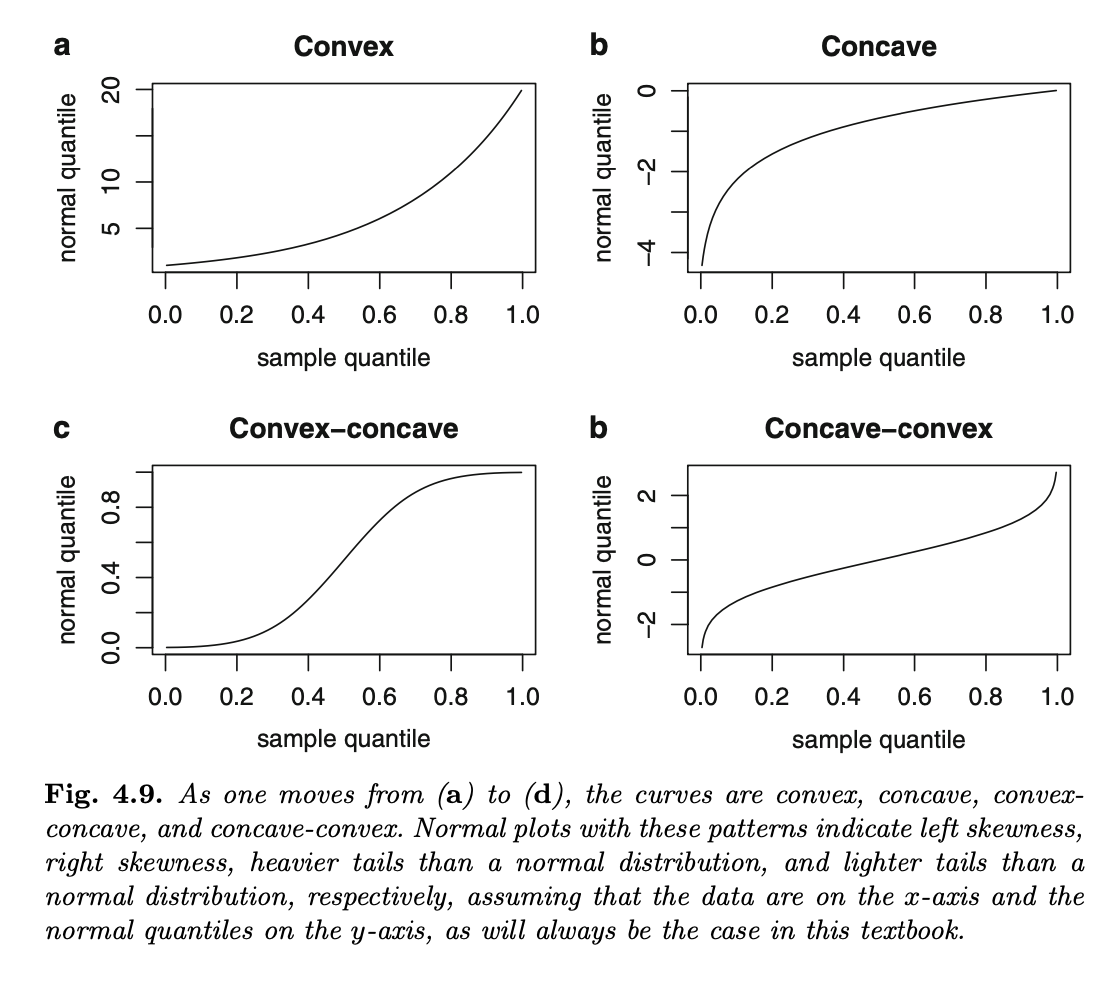

Here is what the above charts indicate:

- __Convex__: Left Skewness

- __Concave__: Right Skewness

- __Convex-Concave__: Heavy Tails compared to the normal distribution

- __Concave-Convex__: Light Tails compared to the normal distribution

Heavy Tails means there are more observations in the 'tails' of the sample distribution than there would be in a normal distribution, and Light Tails means there are fewer than in a normal distribution.

The textbook defines a tail as any value that falls in the set:

$$\forall x, x\in\{-\infty:\mu-2\sigma\}\cup\{\mu+2\sigma:\infty\} $$

Where $x$ is an observation in the sample.

Additionally, the median and MAD could replace $\mu$ and $\sigma$, respectively, as they are less sensitive to tail weight.

#### __Best Practices for Normal Probability Plots__

Add a reference line to the normal plot to give a better idea of if the plot is reasonably linear

Graph the line in point-slope form with the 1st and 3rd quartile pairs of each set of quantiles. The formula for the line is:

$$ y-Q_{1p} = \frac{Q_{1s}-Q_{3s}}{Q_{1p}-Q_{3p}}(x-Q_{1s})$$

Where $Q_1, Q_3$ are the first and third quartiles corresponding to the sample($s$) and the population($p$)

Additionally, try a least-squares fit to all of the quantiles, or use a subset of the quantiles like [.1,.9] to avoid outliers influencing the line.

A plot is not enough to determine normality, especially if the sample size is small! See [Section 4.4](#44-tests-of-normality) to see ways to evaulate the normality of the distribution.

Lastly, the chapter introduces t-distributions, which the textbook claims are a reasonable model for stock returns and other market data.



### _4.3.3: Half-Normal Plots_

Half-Normal plots are a variation of the normal plot used to detect outliers, rather than checking for a normal distribution.

This is acheived by taking a set of data $Y_1, ..., Y_n$ and checking the absolute deviations $|Y_1-\bar{Y}|, ..., |Y_1-\bar{Y}|$ to see if any values are unusual.

To plot a half-normal plot, plot these deviations against the quantiles of a normal distribution $Z$ where $Z$ is $N(0,1)$, or $Z$ is normally distributed with a mean of 0 and a variance of 1.

### _4.3.4 Quantile-Quantile Plots_

A Normal Probability Plot is a special case of a _quantile-quantile plot_, or a _QQ Plot_. A QQ Plot is a plot of one sample or distribution plotted against a second sample or distribution.

This is useful for comparing the distribution of samples and examining the relationship between the two.

###### Note to Self: come back to this later and try graphing each distribution found here as a QQ plot: https://www.math.wm.edu/~leemis/chart/UDR/UDR.html

### ___4.4: Tests of Normality___

Alongside a normal probability plot, testing the normality of the distribution is a good practice.

###### Definitely come back to this later, for now here are the tests to go and research:

- Shapiro-Wilk test: uses covariance and correlation

- Jarque-Bera test: uses skewness and kurtosis

- Anderson-Darling test

- Cramér-von Mises test

- Kolmogorov-Smirnov tests

Each of the tests without a description compare the sample CDF to the normal CDF to determine normality.

The quick rundown is that a small p-value indicates the sample is not from a normal distribution.

### ___4.5: Boxplots___

Boxplots are very useful visualizations for examining samples. They use the 5-number summary to generate a plot of the Median, IQR and the Upper and Lower Whiskers as well as any outliers in the sample. 

An example use of boxplots would be to see a comparison between the companies ADI, AMAT and AMD's adjusted close prices over the last 5 years:

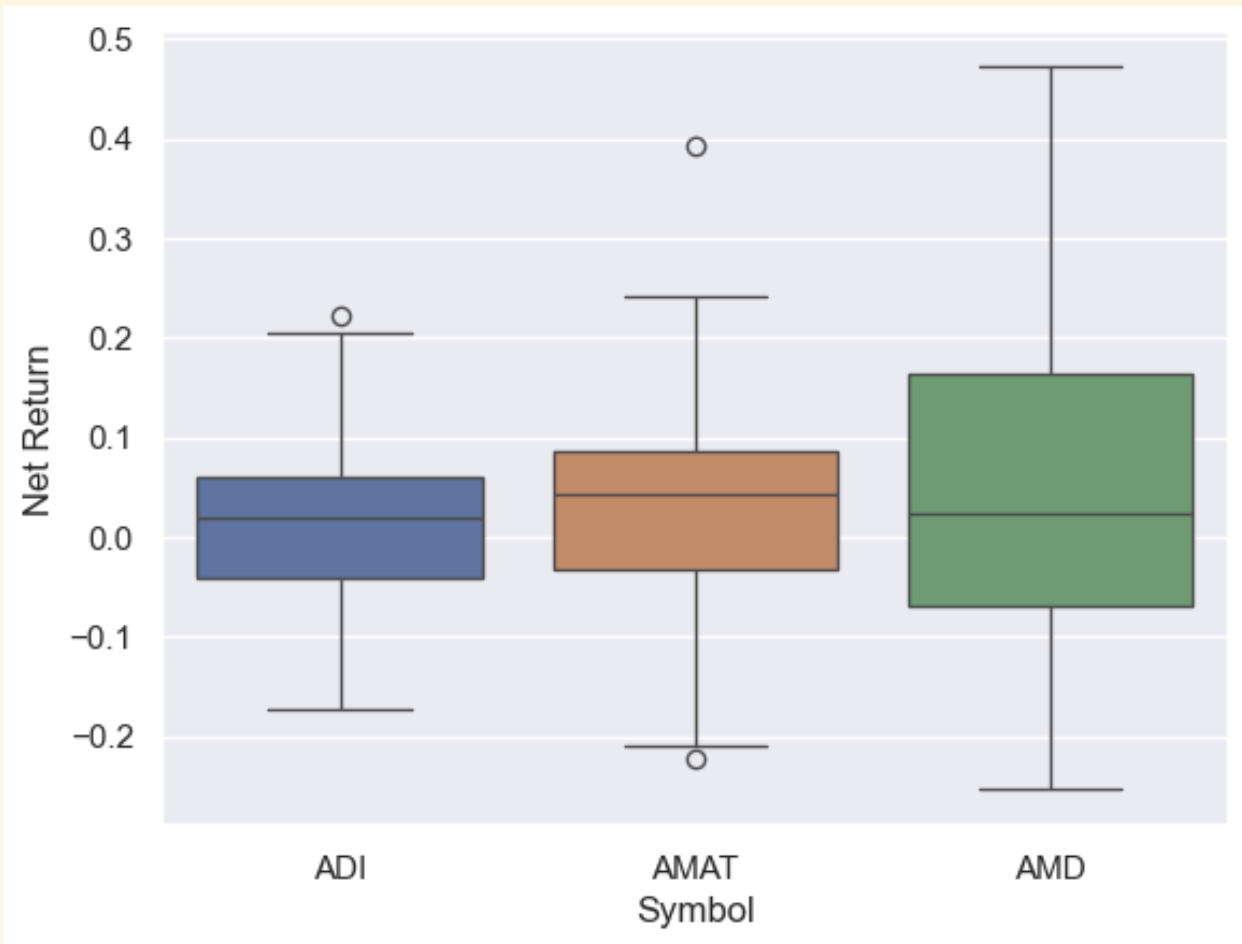

### ___4.6: Data Transformation___

Data Transformation is a powerful tool to better compare statistical data than the raw observations.

Just like with log vs net returns in the last notebook, data analysts may also use the logs, square roots, or power transformations of different data.

Many statistical methods work best when the data are normally distributed, or at least are symmetrically distributed with a common variance, therefore transforming the data to fit that can help analysts understand it better.

A transformation is called __variance stabilizing__ if it removes a dependence between the conditional variance and conditional mean of a variable. 

###### Come back to this when you go over Poisson Distribution in Math 3470

### ___4.8: The Transformation Kernel Density Estimator___

#### __Drawbacks of the KDE__

The KDE undersmooths densities with long tails. This issue occurs because there is no single bandwidth that can estimate the "bumps" that appear from variation in long tails. 

This undersmoothing is not just damaging to the tails of the model, but to the entire model itself, as this incorrect bandwidth selection could lead to oversmoothing in the center of the distribution too.

This oversmoothing can potentially cause the height of the density at the mode or modes to be underestimated.

#### __The Transformation Kernel Density Estimator__

The _transformation kernel density estimator_, or _TKDE_, is a transformation of the sample data so the density is better estimated by the KDE.

This transformation is not a given, and must be selected for each set of data. Typically, the logarithm and the square root are common transformations, so these should be tested first.

The method for computing the TKDE is as follows:

1. Start with data $Y_1, ..., Y_n$

2. Transform the data to $X_1 = g(Y_1), ..., X_n = g(Y_n)$

3. Let $\hat{f_X}$ be the usual KDE, calculated on a grid with $x_1, ..., x_m$ using $X_1, ..., X_n$

4. Plot the Pairs $[g^{-1}(x_j), \hat{f_X}(x_j)|g'\{g^{-1}x_j\}]$ for $j=1, ..., m$

## Applying the Theory to Python

Chapters: 
  Creating a Kernel Density Estimator Function in Python - Todo

    Graph the Kernel Density Estimator - Todo

  Computing the Sample CDF - Todo

    Computing the Central Limit Theory for Sample Quantiles - Todo

    Graphing a Half-Normal Plot - Todo

    Graphing a QQ Plot - Todo

  Creating a Shapiro-Wilk Test Function in Python - Todo

  Data Transformation, Logs and Square Roots - Todo

  Graph the Transformed Kernel Density Estimator using the Transformed Data - Todo

### _Accessing Data for Python_

The data for the next chapters in python will be pulled from the Semiconductor Industry CSVs used in the Returns notebook.

The company used will be APH and the data accessed will be monthly, weekly, and daily candle data.

_(ARM was skipped over because its data only reaches back to 2023)_

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

# Set Filename and Import to DataFrame
aph_d_fn = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/APH/APH_Candles_Daily.CSV'
aph_daily_df = pd.read_csv(aph_d_fn)

# Clean DataFrame
aph_daily_df = aph_daily_df.filter(items=['Date', 'Adj Close'])
aph_daily_df = aph_daily_df.rename(columns={'Adj Close':'Adj_Close'})
aph_daily_df.head()

,Date,Adj_Close
0,2019-01-25,41.033318
1,2019-01-28,40.771805
2,2019-01-29,40.923958
3,2019-01-30,41.941471
4,2019-01-31,41.803589


#### Define the Returns Functions

_From returns_notes.ipynb_

In [3]:
# Net Return and Log Return Functions:
def get_net_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Net_Return']= df[col_name].pct_change(periods=num_periods)
    return df

def get_log_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Log_Return'] = np.log(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

# New one for Transformations: Root Returns
def get_root_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Root_Return'] = np.sqrt(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

#### Calculating Log and Net Returns for the DataFrame

In [4]:
aph_df = get_net_returns(aph_daily_df, 'Adj_Close', 1)
aph_df = get_log_returns(aph_df, 'Adj_Close', 1)
aph_df = get_root_returns(aph_df, 'Adj_Close', 1)

aph_df.head()

,Date,Adj_Close,Net_Return,Log_Return,Root_Return
0,2019-01-25,41.033318,NaN,NaN,NaN
1,2019-01-28,40.771805,-0.006373,-0.006394,0.996808
2,2019-01-29,40.923958,0.003732,0.003725,1.001864
3,2019-01-30,41.941471,0.024864,0.024559,1.012355
4,2019-01-31,41.803589,-0.003287,-0.003293,0.998355


### _Creating a Histogram in Python_

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

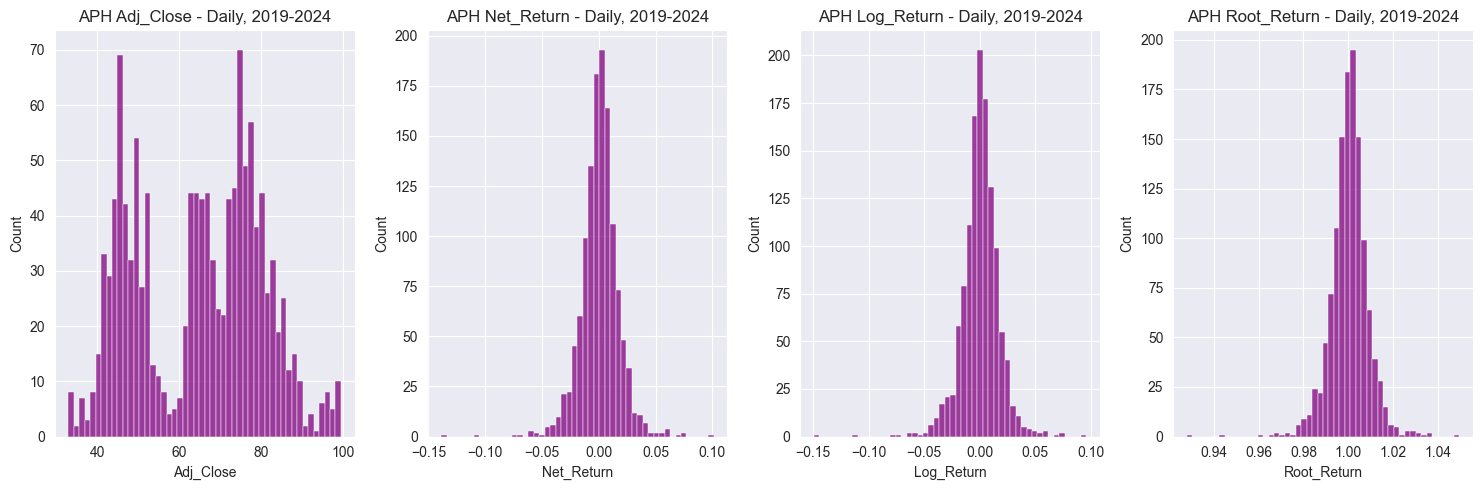

In [6]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=0
cols = aph_df.columns.to_list()
while i<4:
    sns.histplot(data=aph_df[cols[i+1]].dropna(), ax=axs[i], bins=50, color='purple')
    axs[i].set_title(f'APH {cols[i+1]} - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Here are the probability distributions for APH. The graphs are in order from left to right and plot the Daily Adjusted Closing Price, Net Returns, Log Returns, and Root Returns of the stock.

The Adjusted Closing Prices seem to follow a multi-modal distribution, while all of the transformed returns look like they follow a Normal Distribution.

#### _Checking the Distribution Based on Bin Size:_

The shape of the distribution can be examined by plotting a series of histograms from a small number of bins to a large number of bins to see if a distribution starts to take shape.

##### Adjusted Close

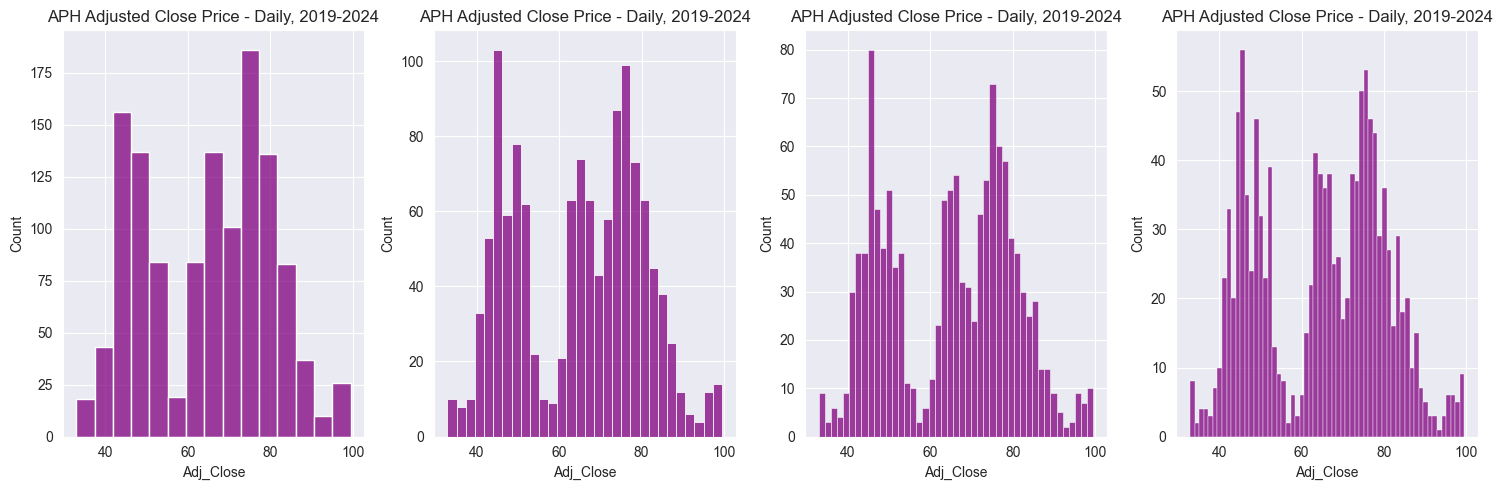

In [7]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Adj_Close'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Adjusted Close Price - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### Net Returns

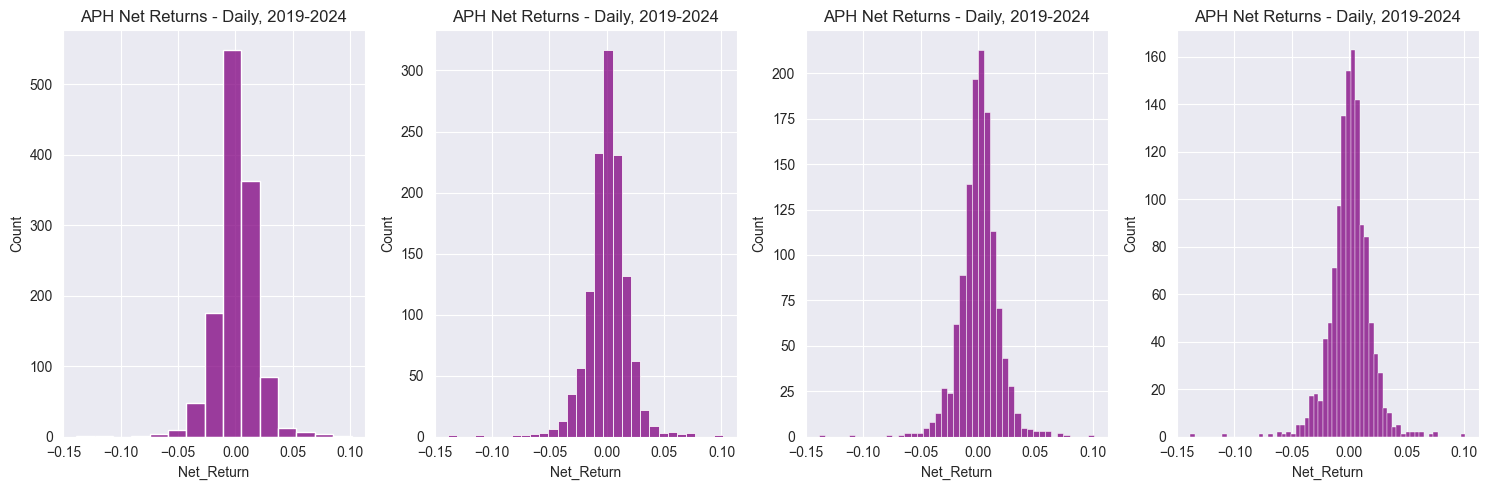

In [8]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Net_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Net Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### Log Returns

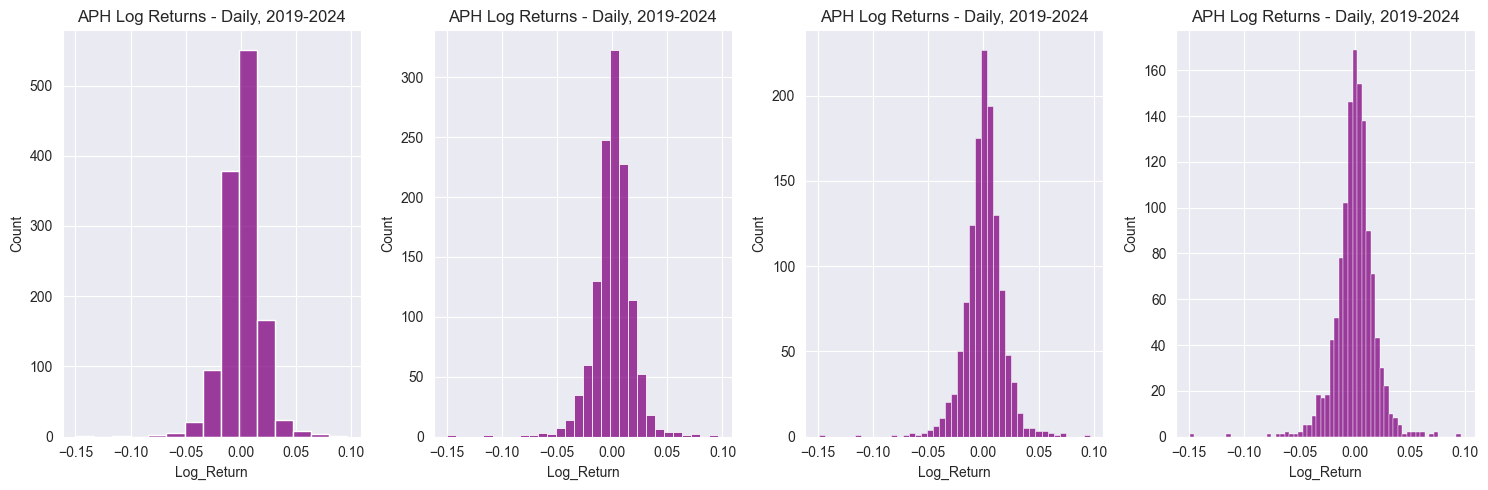

In [9]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Log_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Log Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### Root Returns

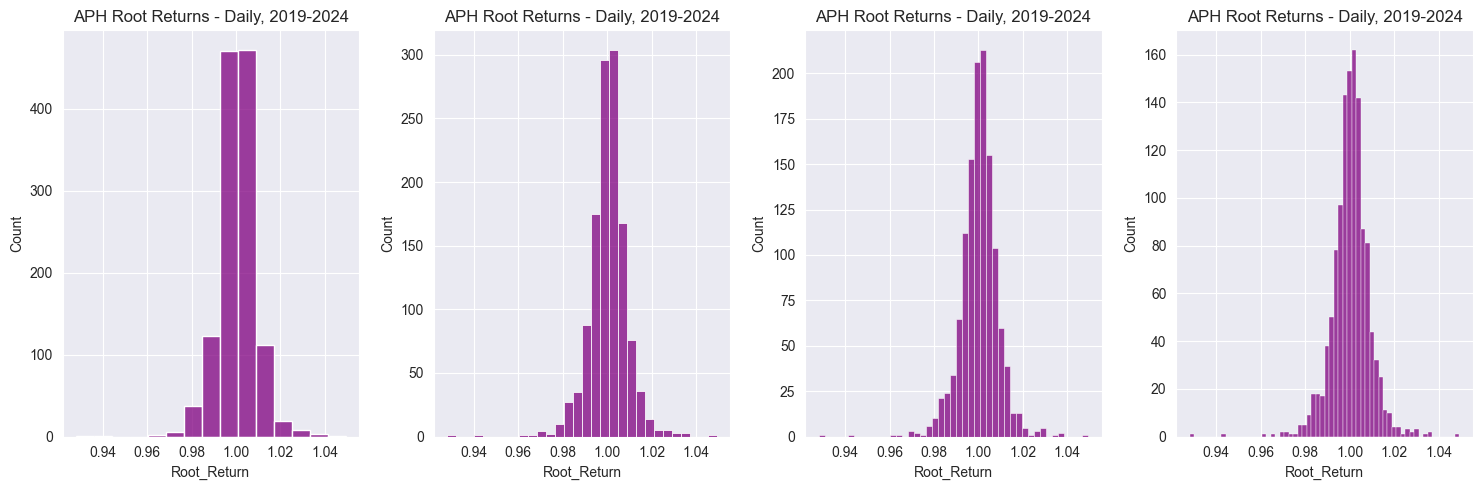

In [10]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Root_Return'].dropna(), ax=axs[i-1], bins=15*i, color='purple')
    axs[i-1].set_title(f'APH Root Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

For each of the distributions, as the bin size increases, the distribution's shape becomes clearer. The returns all seem to have a normal distribution, while the raw price data appears to have a multimodal distribution.

### Creating a Kernel Density Estimator Function in Python

The Kernel Density Estimator is a more refined way to examine how the data are distributed than a histogram. 

Recall that for a time series $Y_1, ..., Y_n$, the function for the KDE is: 

$$\hat{f}(y) = \frac{1}{nb}\sum_{i=1}^{n}K(\frac{y-Y_i}{b})$$

### Computing the Sample CDF

### Compute the Sample Quantiles

To calculate the set of all quantiles for a sample, the data must first be ordered:

In [11]:
aph_ac = aph_df['Adj_Close'].dropna().to_list()
aph_nr = aph_df['Net_Return'].dropna().to_list()
aph_lr = aph_df['Log_Return'].dropna().to_list()
aph_rr = aph_df['Root_Return'].dropna().to_list()

The algorithm for finding the quantiles of a dataset in MATH 3470 is as follows:

1. Order the Data

2. Find $L=\frac{np}{100}$, where $n$ is the number of data and $p$ is the pth percentile

3. If $L$ is a fraction, round up to the nearest whole number

4. If $L$ is a whole number, then add .5 to $L$

  - This won't work for array indexing, instead the algorithm will compute the average of the data in the $p$-th and $p+1$-th positions in the array

5. The $p$-th percentile is the value in that position

In [12]:
import math

def get_all_quantiles(arr: list):
    quantiles = []

    arr.sort()
    p = 0
    n = len(arr)

    while p<100:
        l=0.0
        
        l = n * (p*.01) / 100
        if l.is_integer(): # compute the average of the ith and i+1th position

            l_casted = (int) (l)

            try:
                val = (arr[l_casted] + arr[l_casted+1])/2
                quantiles.append(val)
            except IndexError as e:
                print(e)
        else: # Round L up to the nearest int and add that index
            l = math.ceil(l)
            l_casted = (int) (l)
            quantiles.append(arr[l_casted])
        p+=1

    return quantiles

In [13]:
ac_quantiles = get_all_quantiles(aph_ac)
nr_quantiles = get_all_quantiles(aph_nr)
lr_quantiles = get_all_quantiles(aph_lr)
rr_quantiles = get_all_quantiles(aph_rr)

__Adjusted Close Quantiles:__

In [14]:
print(ac_quantiles)

[32.935895919799805, 32.9527587890625, 32.9527587890625, 32.9527587890625, 32.9527587890625, 32.9527587890625, 32.9527587890625, 32.9527587890625, 32.95756912231445, 32.95756912231445, 32.95756912231445, 32.95756912231445, 32.95756912231445, 32.95756912231445, 32.95756912231445, 32.95756912231445, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.12134552001953, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.23694610595703, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.48744201660156, 33.7379150390625, 33.7379150390625, 33.7379150390625, 33.7379150390625, 33.7379150390625, 33.

__Net Return Quantiles__

In [15]:
print(nr_quantiles)

[-0.12366587485097974, -0.1085793516995246, -0.1085793516995246, -0.1085793516995246, -0.1085793516995246, -0.1085793516995246, -0.1085793516995246, -0.1085793516995246, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.07595070123042658, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.0687368712983174, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06189214058640591, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.06079731786852238, -0.05810227684033453, -0.05810227684033453, -0.05810227684033453, -0.05810227684033453, -0.05810227684033453, -0.05810227684033453, -0

__Log Return Quantiles__

In [16]:
print(lr_quantiles)

[-0.13215604791201216, -0.11493885483794332, -0.11493885483794332, -0.11493885483794332, -0.11493885483794332, -0.11493885483794332, -0.11493885483794332, -0.11493885483794332, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07898985511698359, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.07121341145305, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.0638903478727548, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.06272397415058799, -0.05985858444085517, -0.05985858444085517, -0.05985858444085517, -0.05985858444085517, -0.05985858444085517, -0.05985858444085517, -0.0598585844408551

__Root Return Quantiles__

In [17]:
print(rr_quantiles)

[0.9360925113778056, 0.9441507550706484, 0.9441507550706484, 0.9441507550706484, 0.9441507550706484, 0.9441507550706484, 0.9441507550706484, 0.9441507550706484, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.96127482998858, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.965019755601761, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9685596829383278, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9691246989585384, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9705141540233535, 0.9723179020165333, 0.9723179020165333, 0.9723179020165333, 0.9

### Central Limit Theorem for Sample Quantiles

### Normal Probability Plots

A Normal Probability Plot is the sample graphed against a theoretical normal distribution. The normal distribution used is one generated from [Social Science Statistics](<https://www.socscistatistics.com/utilities/normaldistribution/default.aspx>), Using a $\mu$ of 0, a $\sigma$ of 1 and a size of 800.

In [19]:
pop_distribution = pd.read_csv('/Users/dB/Documents/repos/github/pythonic-finance/docs/test_distributions/test_normal_distribution.csv')
pop_quantiles = get_all_quantiles(pop_distribution['Value'].to_list())
print(pop_quantiles)

[-3.01, -2.96, -2.96, -2.96, -2.96, -2.96, -2.96, -2.92, -2.92, -2.92, -2.92, -2.92, -2.92, -2.89, -2.89, -2.89, -2.89, -2.89, -2.89, -2.87, -2.87, -2.87, -2.87, -2.87, -2.87, -2.855, -2.84, -2.84, -2.84, -2.84, -2.84, -2.84, -2.71, -2.71, -2.71, -2.71, -2.71, -2.71, -2.68, -2.68, -2.68, -2.68, -2.68, -2.68, -2.57, -2.57, -2.57, -2.57, -2.57, -2.57, -2.55, -2.53, -2.53, -2.53, -2.53, -2.53, -2.53, -2.51, -2.51, -2.51, -2.51, -2.51, -2.51, -2.36, -2.36, -2.36, -2.36, -2.36, -2.36, -2.34, -2.34, -2.34, -2.34, -2.34, -2.34, -2.3099999999999996, -2.28, -2.28, -2.28, -2.28, -2.28, -2.28, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.22, -2.17, -2.17, -2.17, -2.17, -2.17, -2.17]


#### _Graphing the Sample Quantiles against the Population Quantiles_

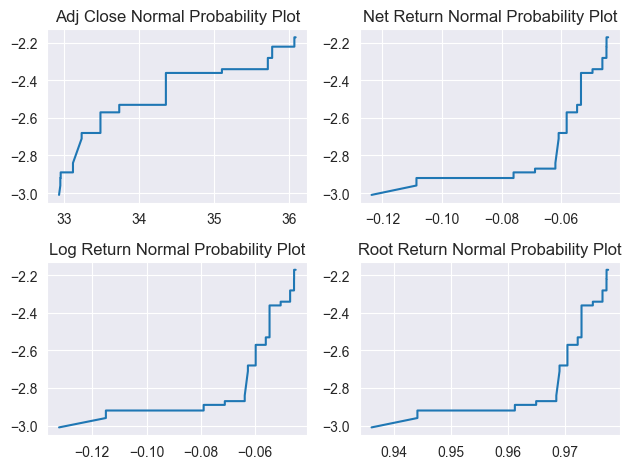

In [22]:
# Create subplots
fig, axs = plt.subplots(2, 2)

# Plot data on each subplot
axs[0, 0].plot(ac_quantiles, pop_quantiles)
axs[0, 0].set_title('Adj Close Normal Probability Plot')
axs[0, 1].plot(nr_quantiles, pop_quantiles)
axs[0, 1].set_title('Net Return Normal Probability Plot')
axs[1, 0].plot(lr_quantiles, pop_quantiles)
axs[1, 0].set_title('Log Return Normal Probability Plot')
axs[1, 1].plot(rr_quantiles, pop_quantiles)
axs[1, 1].set_title('Root Return Normal Probability Plot')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Recall that for a Normal Probability Plot, the following patterns indicate:

- __Convex__: Left Skewness

- __Concave__: Right Skewness

- __Convex-Concave__: Heavy Tails compared to the normal distribution

- __Concave-Convex__: Light Tails compared to the normal distribution

The Adjusted Close Graph appears to have a convex pattern, indicating Left Skewness. Each of the returns Graphs have a concave pattern, indicating Right Skewness. This suggests that the none of the graphs are normally distributed, or that the graphing technique has an error because it is a pretty simple model.

###### Note: To smooth this graph, a moving average could be used, but I need to talk to my Professors about the Quantile Function and if a mav would distort the data first.

### Half-Normal Plots

### Quantile-Quantile Plots